In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read CSV file
vitals = pd.read_csv('v.csv')

In [ ]:
#vitals = vitals.drop_duplicates()

In [ ]:
vitals.head()

,icustay_id,hr,heartrate,sysbp,diasbp,meanbp,resprate,spo2,urineoutput
0,200613,1,81.0,135.0,70.0,88.0,20.0,100.0,NaN
1,200613,2,82.0,155.0,70.0,90.0,20.0,100.0,NaN
2,200613,3,90.0,155.0,60.0,83.0,19.0,100.0,200.0
3,200613,4,85.0,166.0,62.0,89.0,20.0,100.0,100.0
4,200613,5,87.0,170.0,64.0,90.0,20.0,100.0,NaN


In [ ]:
vitals.describe()

,icustay_id,hr,heartrate,sysbp,diasbp,meanbp,resprate,spo2,urineoutput
count,18168.000000,18168.000000,16948.000000,16341.000000,16337.000000,16406.000000,16709.000000,16589.000000,12374.000000
mean,271217.737120,12.500000,81.607238,129.616252,63.076479,83.408274,18.621723,97.708168,137.783417
std,27260.449243,6.922377,17.018279,21.296798,13.841087,15.274717,4.981361,3.310994,190.225339
min,200613.000000,1.000000,37.000000,49.000000,10.000000,7.000000,1.000000,14.000000,-3250.000000
25%,260773.000000,6.750000,69.000000,115.000000,54.000000,73.000000,15.000000,97.000000,45.000000
50%,280815.000000,12.500000,80.000000,129.000000,62.000000,82.666702,18.000000,98.500000,90.000000
75%,290512.000000,18.250000,92.000000,144.000000,71.000000,92.000000,21.000000,100.000000,160.000000
max,299973.000000,24.000000,163.750000,251.000000,174.000000,293.000000,65.000000,100.000000,7300.000000


In [ ]:
vitals.shape

(18168, 9)

In [ ]:
!pip install fancyimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 6.5 MB/s 
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29899 sha256=89605cc4c943747b1e146671fb79e2830750937c24fe8a7d5085a8f5ebc1d4ab
  Stored in directory: /root/.cache/pip/wheels/e3/04/06/a1a7d89ef4e631ce6268ea2d8cde04f7290651c1ff1025ce68
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11353 sha256=09d937d4d97f1f79ca7d168300bf12fc94b2e7c06e4f28ffdf448bf92811d3f1
  Stored in directory: /root/.cache/pip/wheels/72/21/a8/a045cacd9838abd5643f6bfa852c0796a99d6b1494760494e0
Successfully built fancyimpute knnimpute


In [ ]:
!pip install MICE

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from fancyimpute import IterativeImputer as MICE

In [ ]:
vitals[['heartrate','sysbp',	'diasbp', 'meanbp',	'resprate','spo2','urineoutput']] = MICE().fit_transform(vitals[['heartrate','sysbp',	'diasbp', 'meanbp',	'resprate','spo2','urineoutput']])

In [ ]:
vitals_n = vitals.iloc[:,2:9]
vitals_n.head()

,heartrate,sysbp,diasbp,meanbp,resprate,spo2,urineoutput
0,81.0,135.0,70.0,88.0,20.0,100.0,144.678192
1,82.0,155.0,70.0,90.0,20.0,100.0,140.987100
2,90.0,155.0,60.0,83.0,19.0,100.0,200.000000
3,85.0,166.0,62.0,89.0,20.0,100.0,100.000000
4,87.0,170.0,64.0,90.0,20.0,100.0,132.083648


In [ ]:
vitals_n.shape

(18168, 7)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
x_scaler = MinMaxScaler()

In [ ]:
vitals_n = x_scaler.fit_transform(vitals_n)

In [ ]:
v_array = np.array(vitals_n)

In [ ]:
v_array.shape

(18168, 7)

In [ ]:
time_features = v_array.reshape(-1, 24, 7)

In [ ]:
time_features

In [ ]:
time_features.shape

(757, 24, 7)

In [ ]:
# Read CSV file
m = pd.read_csv('m1.csv')

In [ ]:
m = m.drop_duplicates()

In [ ]:
print('Number of survivors: ' + str(m[m['mortality'] == 0].count()['mortality']))
print('Number of non-survivors: ' + str(m[m['mortality'] == 1].count()['mortality']))
print('Mortality: ' + str(round(100*m[m['mortality'] == 1].sum()['mortality'] / len(m.index.unique()),1)) + '%')

Number of survivors: 450
Number of non-survivors: 307
Mortality: 40.6%


In [ ]:
m.head()

,icustay_id,mortality
0,200613,1
1,201171,1
2,201220,1
3,201382,1
4,201829,1


In [ ]:
m = m.mortality
m

0      1
1      1
2      1
3      1
4      1
      ..
752    0
753    0
754    0
755    0
756    1
Name: mortality, Length: 757, dtype: int64

In [ ]:
m.shape

(757,)

In [ ]:
m_array = np.array(m)

In [ ]:
m_array.shape

(757,)

In [ ]:
aggregated = pd.read_csv("a_fusion.csv")

In [ ]:
aggregated.describe()

,icustay_id,min tempc,min glucose,min gcs,min gcsmotor,min gcsverbal,min gcseyes,min endotrachflag,min bg_po2,min bg_pco2,...,heart_failure,hypertension,paralysis,diabetes_complicated,metastatic_cancer,obesity,weight_loss,alcohol_abuse,drug_abuse,depression
count,757.000000,750.000000,741.000000,757.000000,757.000000,757.000000,757.000000,757.000000,418.000000,418.000000,...,746.000000,757.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,271217.737120,36.305480,118.807242,12.103038,3.863937,1.405548,1.922061,0.322325,138.511962,34.889952,...,0.152815,0.686922,0.158177,0.033512,0.046917,0.025469,0.046917,0.050938,0.018767,0.064343
std,27277.721943,0.823522,34.707687,3.915774,1.995692,2.036862,1.168593,0.467676,75.963838,7.527557,...,0.360050,0.464052,0.365152,0.180090,0.211603,0.157651,0.211603,0.220019,0.135791,0.245528
min,200613.000000,30.500000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,32.000000,18.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,260773.000000,35.888888,97.000000,10.000000,1.000000,0.000000,1.000000,0.000000,88.000000,30.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,280815.000000,36.388889,115.000000,14.000000,4.000000,0.000000,1.000000,0.000000,124.000000,35.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,290512.000000,36.833333,136.000000,15.000000,6.000000,4.000000,3.000000,1.000000,171.000000,39.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,299973.000000,38.700000,268.000000,15.000000,6.000000,5.000000,4.000000,1.000000,514.000000,79.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
aggregated.head()

,icustay_id,min tempc,min glucose,min gcs,min gcsmotor,min gcsverbal,min gcseyes,min endotrachflag,min bg_po2,min bg_pco2,...,heart_failure,hypertension,paralysis,diabetes_complicated,metastatic_cancer,obesity,weight_loss,alcohol_abuse,drug_abuse,depression
0,200613,36.833333,183.0,5,3,0,1,0,154.0,33.0,...,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,201171,35.444446,134.0,3,1,0,1,0,113.0,27.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201220,36.111111,90.5,15,1,0,1,1,158.0,31.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,201382,36.777776,156.0,15,2,0,1,1,202.0,42.0,...,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,201829,36.333333,179.0,3,1,0,1,0,NaN,NaN,...,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_featurenames = aggregated.columns

In [ ]:
aggregated = aggregated.drop_duplicates()

In [ ]:
aggregated.shape

(757, 167)

In [ ]:
aggregated_n = aggregated.drop(['icustay_id'],axis =1)

In [ ]:
aggregated_n.head() 

,min tempc,min glucose,min gcs,min gcsmotor,min gcsverbal,min gcseyes,min endotrachflag,min bg_po2,min bg_pco2,min bg_pao2fio2ratio,...,heart_failure,hypertension,paralysis,diabetes_complicated,metastatic_cancer,obesity,weight_loss,alcohol_abuse,drug_abuse,depression
0,36.833333,183.0,5,3,0,1,0,154.0,33.0,308.000000,...,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,35.444446,134.0,3,1,0,1,0,113.0,27.0,233.333324,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,36.111111,90.5,15,1,0,1,1,158.0,31.0,395.000000,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,36.777776,156.0,15,2,0,1,1,202.0,42.0,504.999993,...,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,36.333333,179.0,3,1,0,1,0,NaN,NaN,NaN,...,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
aggregated_imp = MICE().fit_transform(aggregated_n)

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [ ]:
aggregated_sc = x_scaler.fit_transform(aggregated_imp)

In [ ]:
aggregated_sc.shape

(757, 161)

In [ ]:
a_array = np.array(aggregated_sc)

In [ ]:
a_array.shape

(757, 161)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test,x_train_a, x_test_a = train_test_split(time_features, m_array,a_array, test_size=0.2, random_state=42)

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(time_features, m_array, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(605, 24, 7)

In [ ]:
X_test.shape

(152, 24, 7)

In [ ]:
x_train_a.shape

(605, 161)

In [ ]:
import keras
from keras.layers import LSTM, Dropout, Dense
import tensorflow as tf

**Model1: LSTM model with Temporal Variables**

In [ ]:
model_1 = keras.Sequential()
model_1.add(LSTM(128, input_shape = (24, 7),activation='relu',return_sequences=True))
model_1.add(Dropout(0.1))
model_1.add(LSTM(64, activation='relu'))
model_1.add(Dropout(0.1))
model_1.add(Dense(1, activation="sigmoid"))
model_1.compile(loss="binary_crossentropy"
              , metrics=[keras.metrics.binary_accuracy]
              , optimizer="adam")

model_1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 24, 128)           69632     
                                                                 
 dropout_11 (Dropout)        (None, 24, 128)           0         
                                                                 
 lstm_7 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_18 (Dense)            (None, 1)                 65        
                                                                 
Total params: 119,105
Trainable params: 119,105
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
19/19 [==============================] - 4s 49ms/step - loss: 0.6775 - binary_accuracy: 0.5917
Epoch 2/100
19/19 [==============================] - 1s 50ms/step - loss: 0.6801 - binary_accuracy: 0.5950
Epoch 3/100
19/19 [==============================] - 1s 51ms/step - loss: 0.6758 - binary_accuracy: 0.5950
Epoch 4/100
19/19 [==============================] - 1s 48ms/step - loss: 0.6717 - binary_accuracy: 0.5950
Epoch 5/100
19/19 [==============================] - 1s 49ms/step - loss: 0.6681 - binary_accuracy: 0.6000
Epoch 6/100
19/19 [==============================] - 1s 48ms/step - loss: 0.6696 - binary_accuracy: 0.6033
Epoch 7/100
19/19 [==============================] - 1s 49ms/step - loss: 0.6651 - binary_accuracy: 0.6132
Epoch 8/100
19/19 [==============================] - 1s 46ms/step - loss: 0.6690 - binary_accuracy: 0.6116
Epoch 9/100
19/19 [==============================] - 1s 47ms/step - loss: 0.6646 - binary_accuracy: 0.6066
Epoch 10/100
19/19 [=================

In [ ]:
pred_1 = model_1.predict(X_test)

In [ ]:
y_pred_1 = np.round(pred_1)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [ ]:
print(classification_report(y_test,y_pred_1))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72        90
           1       0.59      0.61      0.60        62

    accuracy                           0.67       152
   macro avg       0.66      0.66      0.66       152
weighted avg       0.67      0.67      0.67       152



In [ ]:
accuracy_score(y_test, y_pred_1)

0.6710526315789473

**Model2: Fully Connected Neural Network with Aggregated Features**

In [ ]:
model_2 = keras.Sequential()
model_2.add(Dense(128, input_shape = (161,)))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(1, activation="sigmoid"))
model_2.compile(loss="binary_crossentropy"
              , metrics=[keras.metrics.binary_accuracy]
              , optimizer="adam")

model_2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 128)               20736     
                                                                 
 dense_26 (Dense)            (None, 64)                8256      
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 dense_27 (Dense)            (None, 1)                 65        
                                                                 
Total params: 29,057
Trainable params: 29,057
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.fit(x_train_a, y_train, batch_size=32, epochs=50)

Epoch 1/50
19/19 [==============================] - 1s 3ms/step - loss: 0.6225 - binary_accuracy: 0.6479
Epoch 2/50
19/19 [==============================] - 0s 3ms/step - loss: 0.5438 - binary_accuracy: 0.7388
Epoch 3/50
19/19 [==============================] - 0s 4ms/step - loss: 0.5288 - binary_accuracy: 0.7504
Epoch 4/50
19/19 [==============================] - 0s 2ms/step - loss: 0.5028 - binary_accuracy: 0.7488
Epoch 5/50
19/19 [==============================] - 0s 3ms/step - loss: 0.5026 - binary_accuracy: 0.7686
Epoch 6/50
19/19 [==============================] - 0s 4ms/step - loss: 0.5044 - binary_accuracy: 0.7719
Epoch 7/50
19/19 [==============================] - 0s 2ms/step - loss: 0.4839 - binary_accuracy: 0.7769
Epoch 8/50
19/19 [==============================] - 0s 3ms/step - loss: 0.4696 - binary_accuracy: 0.7901
Epoch 9/50
19/19 [==============================] - 0s 4ms/step - loss: 0.4863 - binary_accuracy: 0.7719
Epoch 10/50
19/19 [==============================] - 0s

In [ ]:
pred_2 = model_2.predict(x_test_a)

In [ ]:
y_pred_2 = np.round(pred_2)

In [ ]:
print(classification_report(y_test,y_pred_2))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84        90
           1       0.79      0.73      0.76        62

    accuracy                           0.81       152
   macro avg       0.81      0.80      0.80       152
weighted avg       0.81      0.81      0.81       152



**Explanability of Aggregated Features**

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 4.2 MB/s 


In [ ]:
import shap

In [ ]:
explainer2 = shap.DeepExplainer(model_2, x_train_a)

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


In [ ]:
shap_values = explainer2.shap_values(x_test_a)

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


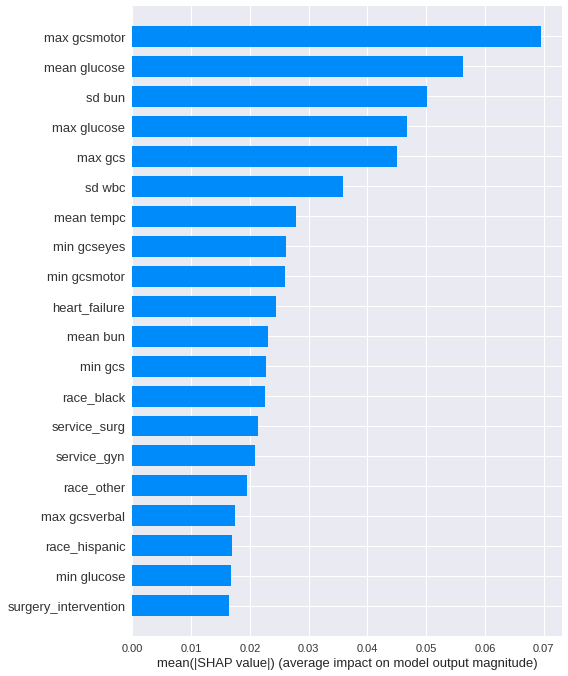

In [ ]:
shap.summary_plot(shap_values[0], plot_type = 'bar', feature_names = aggregated.columns)

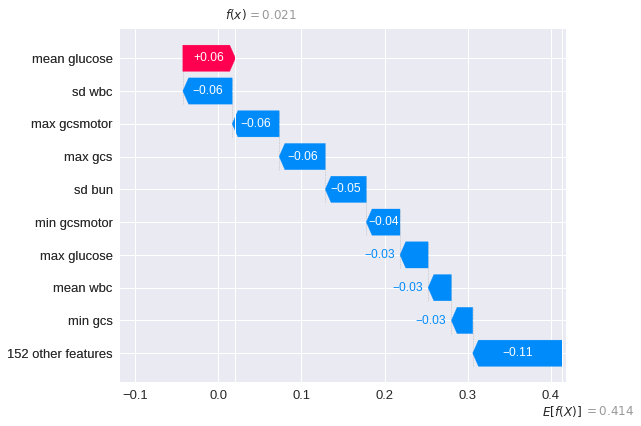

In [ ]:
shap.plots._waterfall.waterfall_legacy(explainer2.expected_value[0].numpy(), shap_values[0][0], feature_names = aggregated.columns)

In [ ]:
accuracy_score(y_test, y_pred_2)

0.7828947368421053

**Ensemble (Averaging Method)**

In [ ]:
# final prediction after averaging on the prediction of all 2 models
pred_final = (pred_1+pred_2)/2.0

In [ ]:
y_test_pred = np.round(pred_final)

In [ ]:
accuracy_score(y_test, y_test_pred)

0.8289473684210527

In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        90
           1       0.80      0.77      0.79        62

    accuracy                           0.83       152
   macro avg       0.82      0.82      0.82       152
weighted avg       0.83      0.83      0.83       152



In [ ]:
# auc scores
auc_score = roc_auc_score(y_test, y_test_pred)
print(auc_score)

0.8204301075268817


In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr, tpr, thresh = roc_curve(y_test, pred_final)

In [ ]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

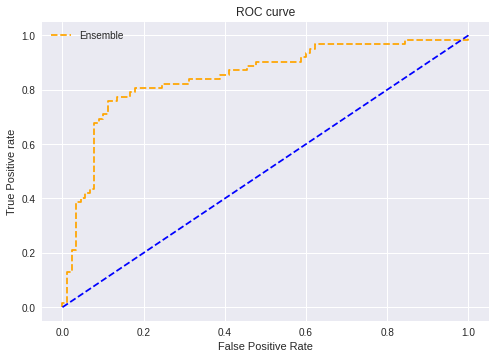

In [ ]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Ensemble')
# plt.plot(fpr2, tpr2, linestyle='--',color='green', label='decision tree')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();